# Análise do Titanic - Parte 2

## Importando as bases de dados de treino e teste

In [1]:
import pandas as pd

* Vamos utilizar a mesma base que finalizou-se a Parte 2.

In [12]:
treino = pd.read_csv('Parte 2/base_parte2.csv')

In [13]:
treino.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,MaleCheck,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,male,22.0,1,0,7.2500,S,1,0,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,0,1,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,0,0,1


In [14]:
teste = pd.read_csv('Parte 2/base_teste_parte2.csv')

In [15]:
teste.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,MaleCheck,Embarked_C,Embarked_Q,Embarked_S
0,892,3,male,34.5,0,0,7.8292,Q,1,0,1,0
1,893,3,female,47.0,1,0,7.0000,S,0,0,0,1
2,894,2,male,62.0,0,0,9.6875,Q,1,0,1,0


* Novamente, podemos aplicar as nossas bases nos modelos de Machine Learning
    - É necessário retirar as colunas do tipo *object*

In [22]:
treino = treino.drop(['Sex', 'Embarked'], axis=1)
teste = teste.drop(['Sex', 'Embarked'], axis=1)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = treino.drop(['PassengerId', 'Survived'], axis=1)
y = treino.Survived

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

* Árvore de Decisão

In [26]:
from sklearn import tree

In [27]:
clf_ac = tree.DecisionTreeClassifier(random_state=42)
clf_ac = clf_ac.fit(X_train, y_train)

y_pred_ac = clf_ac.predict(X_val)

* KNeighborsClassifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn = clf_knn.fit(X_train, y_train)

y_pred_knn = clf_knn.predict(X_val)

* Regressão Logística

In [29]:
from sklearn.linear_model import LogisticRegression

clf_rl = LogisticRegression(random_state=42, max_iter=1000)
clf_rl = clf_rl.fit(X_train, y_train)

y_pred_rl = clf_rl.predict(X_val)

* Avaliando a acurácia de cada modelo

In [30]:
from sklearn.metrics import accuracy_score

In [ ]:
as_ac = accuracy_score(y_val, y_pred_ac)

as_ac

0.7491525423728813

In [33]:
as_knn = accuracy_score(y_val, y_pred_knn)

as_knn

0.7152542372881356

In [37]:
as_rl = accuracy_score(y_val, y_pred_rl)

as_rl

0.8169491525423729

* Salvando esses resultados em DataFrames

In [39]:
as_df = pd.DataFrame({
    'modelos': ['arvore', 'knn', 'reg. log.'],
    'inicial': [as_ac, as_knn, as_rl]
})

as_df

,modelos,inicial
0,arvore,0.749153
1,knn,0.715254
2,reg. log.,0.816949


#### Analisando a escala dos dados

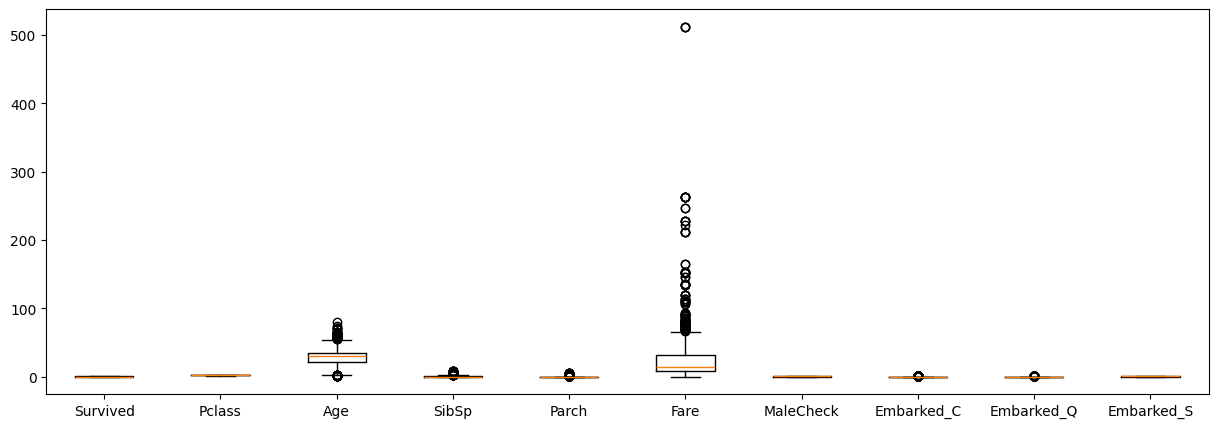

In [41]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,5))

ax.boxplot(treino.iloc[:, 1:11])
ax.set_xticks(range(1, treino.iloc[:, 1:11].shape[1]+1), treino.iloc[:, 1:11].columns)

plt.show()

* Quando analisamos as features *Age* e *Fare* em comparação com as outras features, percebe-se que ambas estão fora de escala. O que isso significa?
    - Os valores destas features estão em intervalos numéricos muito diferentes dos intervalos das outras features.
    - Por que isso é relevante?
        - Muitos algoritmos de Machine Learning (como Regressão Logística, KNN, SVM e Neural Networking) são muito sensíveis à escala dos dados:
            - Features com valores maiores dominam as métricas de distância;
            - O processo de otimização pode ficar mais difícil, onde os pesos (bias) associados às features fora de escala variam muito mais;

    - Solução: aplicar normalização ou padronização
        - Aqui vamos utilizar o **RobustScaler** -> ele trata os *outliers* destas features de maneira robusta, isto é, sem perder precisão

* StandardScaler: $$z = \frac{x - \mu}{\sigma},$$
onde $\mu$ é a média da feature e $\sigma$ é o desvio padrão. Após reescalar, os dados ficam com média 0 e desvio padrão 1. 
    - Sensível a outliers: se houver valores muito extremos, a média e o desvio padrão são distorcidos.
    - Bom para dados em perfil próximo de Gaussiano

* RobustScaler: $$z = \frac{x - med}{IQR},$$
onde $$med$$ é a mediana da feature e $IQR = Q_3 - Q_1$ é o intervalor interquartílico, ou seja, a diferença entre o 3º e o 1º quartil. Após reescalar, os dados ficam centrados na mediana e escalados pelo $IQR$
    - Mais robustos a outliers, porque a mediana e $IQR$ não são tão influenciados por valores extremos
    - Bom para dados com perfil assimétrico

In [43]:
from sklearn.preprocessing import RobustScaler

In [44]:
transformer = RobustScaler().fit(treino[['Age', 'Fare']])

In [ ]:
transformer.transform(treino[['Age', 'Fare']])

array([[-0.59223982, -0.3120106 ],
       [ 0.63852941,  2.46124229],
       [-0.28454751, -0.28277666],
       ...,
       [ 0.        ,  0.38960398],
       [-0.28454751,  0.67328148],
       [ 0.17699095, -0.29035583]])

In [46]:
treino[['Age', 'Fare']] = transformer.transform(treino[['Age', 'Fare']])

In [47]:
# Base de teste
transformer_teste = RobustScaler().fit(teste[['Age', 'Fare']])
transformer_teste.transform(teste[['Age', 'Fare']])

array([[ 3.31561540e-01, -2.80670389e-01],
       [ 1.31195370e+00, -3.15799731e-01],
       [ 2.48842429e+00, -2.01942875e-01],
       [-2.56673754e-01, -2.45367350e-01],
       [-6.48830617e-01, -9.17929860e-02],
       [-1.27628160e+00, -2.21536845e-01],
       [-2.13796362e-02, -2.89143458e-01],
       [-3.35105126e-01,  6.16237788e-01],
       [-9.62556107e-01, -3.06089594e-01],
       [-7.27261989e-01,  4.10765881e-01],
       [ 0.00000000e+00, -2.77848857e-01],
       [ 1.23352232e+00,  4.89141763e-01],
       [-5.70399244e-01,  2.87289974e+00],
       [ 2.56685566e+00,  4.89141763e-01],
       [ 1.31195370e+00,  1.97934266e+00],
       [-4.91967871e-01,  5.62044043e-01],
       [ 3.70777227e-01, -8.91451521e-02],
       [-7.27261989e-01, -3.06267529e-01],
       [-2.56673754e-01, -2.76611789e-01],
       [ 1.15509095e+00, -3.06267529e-01],
       [ 1.93940468e+00,  1.90414418e+00],
       [-1.66843846e+00, -4.78025097e-01],
       [ 0.00000000e+00,  7.29916710e-01],
       [-7.

In [49]:
teste[['Age', 'Fare']] = transformer_teste.transform(teste[['Age', 'Fare']])

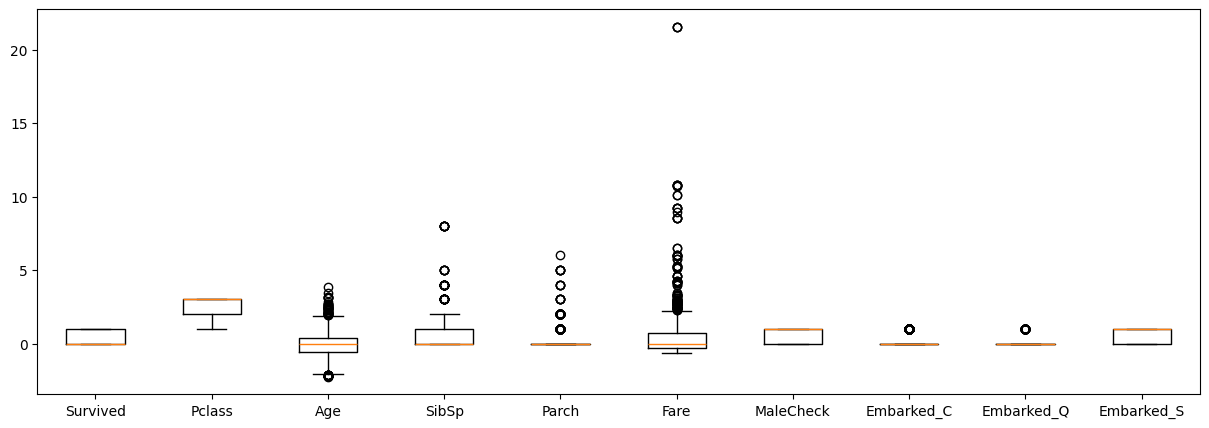

In [50]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,5))

ax.boxplot(treino.iloc[:, 1:11])
ax.set_xticks(range(1, treino.iloc[:, 1:11].shape[1]+1), treino.iloc[:, 1:11].columns)

plt.show()

In [51]:
treino.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,-0.592240,1,0,-0.312011,1,0,0,1
1,2,1,1,0.638529,1,0,2.461242,0,1,0,0
2,3,1,3,-0.284548,0,0,-0.282777,0,0,0,1


* Realizando o treinamneto do modelo após reescalar os dados 

In [56]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [57]:
X = treino.drop(['PassengerId', 'Survived'], axis=1)
y = treino.Survived

In [58]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

* Árvore de Decisão

In [59]:
from sklearn import tree

clf_ac = tree.DecisionTreeClassifier(random_state=42)
clf_ac = clf_ac.fit(X_train, y_train)

y_pred_ac = clf_ac.predict(X_val)

as_ac = accuracy_score(y_val, y_pred_ac)

as_ac

0.7491525423728813

* KNeighborsClassifier

In [60]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn = clf_knn.fit(X_train, y_train)

y_pred_knn = clf_knn.predict(X_val)

as_knn = accuracy_score(y_val, y_pred_knn)

as_knn

0.8

* Regressão Logística

In [61]:
from sklearn.linear_model import LogisticRegression

clf_rl = LogisticRegression(random_state=42, max_iter=1000)
clf_rl = clf_rl.fit(X_train, y_train)

y_pred_rl = clf_rl.predict(X_val)

as_rl = accuracy_score(y_val, y_pred_rl)

as_rl

0.8169491525423729

In [62]:
as_df['escala'] = [as_ac, as_knn, as_rl]

as_df

,modelos,inicial,escala
0,arvore,0.749153,0.749153
1,knn,0.715254,0.800000
2,reg. log.,0.816949,0.816949


* Nota-se que, o modelo de Árvore de Decisão não se alterou, já que não depende de distância entre pontos para classificar, entretanto, apesar da Regressão Logística dependender da distância entre valores e reais e previstos, aqui não houve umudanças. Já para o caso do modelo KNN, o qual depende fortemente das distânicas, entender e reestruturar a escala da base de dados foi essencial para aumentar a acurácia do modelo.

#### Analisando outras features

* Como podemos perceber, desde a análise realizada na Parte1, não utilizamos ou entramos afundo das features SibSp e Parch
    - SibSp: número de irmãos/cônjuges a bordo do Titanic
    - Parch: número de pais/filhos a bordo do Titanic

* Podemos tentar entender como essas duas features influenciam na taxa de sobrevivência ao desastre do Titanic

In [ ]:
# Verificando a sobrevivência para SibS

treino.groupby('SibSp')['Survived'].mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

* Este resultado é entendido como:
    - Das pessoas que viajavam sozinhas (SibSp = 0), ~34% sobreviveram
    - Das pessoas que viajavam com *pelo menos* uma pessoa (SibSp = 1), ~53% sobreviveram
    - E se estende para os outros

* Podemos ter uma análise prévia destes valores: em um desastre como o do Titanic, a tendência é que Mulheres e Crianças sejam salvas. Para a época, mulheres não poderiam viajar sozinhas, logo elas estariam acomaphadas, assim como crianças.

In [65]:
treino.groupby('SibSp')['Survived'].agg(['sum', 'count', 'mean'])

,sum,count,mean
SibSp,,,
0,210,608,0.345395
1,112,209,0.535885
2,13,28,0.464286
3,4,16,0.250000
4,3,18,0.166667
5,0,5,0.000000
8,0,7,0.000000


* Temos:
    - 608 pessoas viajaram sozinhas, 210 sobreviveram
    - 209 pessoas viajaram com pelo menos uma pessoa, 112 sobraviveram

In [67]:
SibSp_df = treino.groupby('SibSp')['Survived'].agg(['sum', 'count', 'mean']).reset_index()
SibSp_df.columns = ['SibSp', 'Sobreviventes', 'Total', 'taxa_sobrevivencia']

SibSp_df

,SibSp,Sobreviventes,Total,taxa_sobrevivencia
0,0,210,608,0.345395
1,1,112,209,0.535885
2,2,13,28,0.464286
3,3,4,16,0.250000
4,4,3,18,0.166667
5,5,0,5,0.000000
6,8,0,7,0.000000


In [68]:
# Verificando a taxa de sobrevivência para Parch

Parch_df = treino.groupby('Parch')['Survived'].agg(['sum', 'count', 'mean']).reset_index()
Parch_df.columns = ['Parch', 'Sobreviventes', 'Total', 'taxa_sobrevivencia']

Parch_df

,Parch,Sobreviventes,Total,taxa_sobrevivencia
0,0,233,678,0.343658
1,1,65,118,0.550847
2,2,40,80,0.500000
3,3,3,5,0.600000
4,4,0,4,0.000000
5,5,1,5,0.200000
6,6,0,1,0.000000


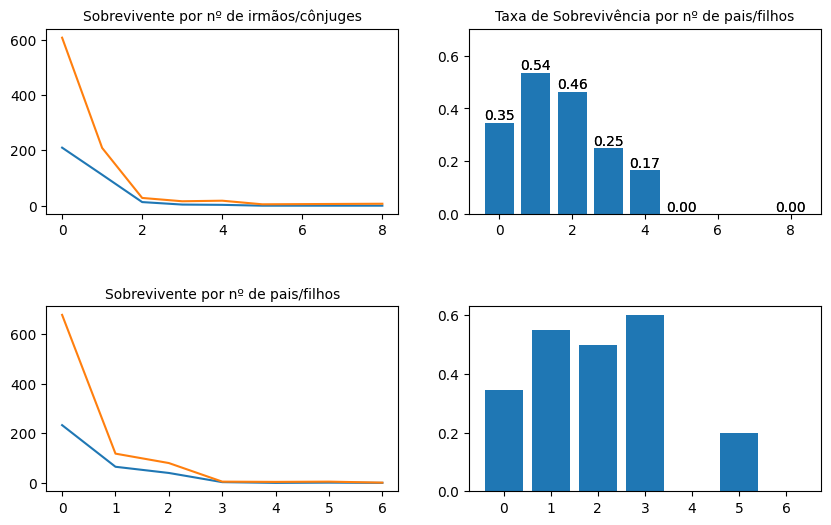

In [69]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10,6))

ax[0,0].plot(SibSp_df.SibSp, SibSp_df.Sobreviventes)
ax[0,0].plot(SibSp_df.SibSp, SibSp_df.Total)
ax[0,0].set_title('Sobrevivente por nº de irmãos/cônjuges', fontsize=10)

labels1 = ax[0,1].bar(SibSp_df.SibSp, SibSp_df.taxa_sobrevivencia)
ax[0,1].bar_label(labels1, fmt='%.02f')
ax[0,1].set(ylim=(0, 0.6))
ax[0,1].set_title('Taxa de Sobrevivência por nº de irmãos/cônjuges', fontsize=10)

ax[1,0].plot(Parch_df.Parch, Parch_df.Sobreviventes)
ax[1,0].plot(Parch_df.Parch, Parch_df.Total)
ax[1,0].set_title('Sobrevivente por nº de pais/filhos', fontsize=10)

labels2 = ax[1,1].bar(Parch_df.Parch, Parch_df.taxa_sobrevivencia)
ax[0,1].bar_label(labels1, fmt='%.02f')
ax[0,1].set(ylim=(0, 0.7))
ax[0,1].set_title('Taxa de Sobrevivência por nº de pais/filhos', fontsize=10)

plt.subplots_adjust(hspace=0.5)

plt.show()

* Passageiros viajando sozinho tem uma menor taxa de sobrevivência
    - É interessante identificar quais dos passageiros está viajando sozinho para atribuir ao modelo

In [71]:
def sozinho(a, b):
    if (a == 0 and b == 0):
        return 1
    else:
        return 0

In [73]:
treino['Sozinho'] = treino.apply(lambda x: sozinho(x.SibSp, x.Parch), axis=1)

In [75]:
treino.groupby('Sozinho')[['SibSp', 'Parch']].max()

,SibSp,Parch
Sozinho,,
0,8,6
1,0,0


In [76]:
teste['Sozinho'] = teste.apply(lambda x: sozinho(x.SibSp, x.Parch), axis=1)

* Agora, criando uma coluna para passageiros com familiares a bordo

In [77]:
treino['Familiares'] = treino.SibSp + treino.Parch

In [78]:
teste['Familiares'] = teste.SibSp + teste.Parch

In [79]:
treino.groupby('Familiares')['Survived'].agg(['sum', 'count', 'mean']).reset_index()

,Familiares,sum,count,mean
0,0,163,537,0.303538
1,1,89,161,0.552795
2,2,59,102,0.578431
3,3,21,29,0.724138
4,4,3,15,0.200000
5,5,3,22,0.136364
6,6,4,12,0.333333
7,7,0,6,0.000000
8,10,0,7,0.000000


In [82]:
Familiares_df = treino.groupby('Familiares')['Survived'].agg(['sum', 'count', 'mean']).reset_index()
Familiares_df = treino.groupby('Familiares')['Survived'].agg(['sum', 'count', 'mean']).reset_index()
Familiares_df.columns = ['Familiares', 'Sobreviventes', 'Total', 'taxa_sobrevivencia']

In [83]:
Familiares_df

,Familiares,Sobreviventes,Total,taxa_sobrevivencia
0,0,163,537,0.303538
1,1,89,161,0.552795
2,2,59,102,0.578431
3,3,21,29,0.724138
4,4,3,15,0.200000
5,5,3,22,0.136364
6,6,4,12,0.333333
7,7,0,6,0.000000
8,10,0,7,0.000000


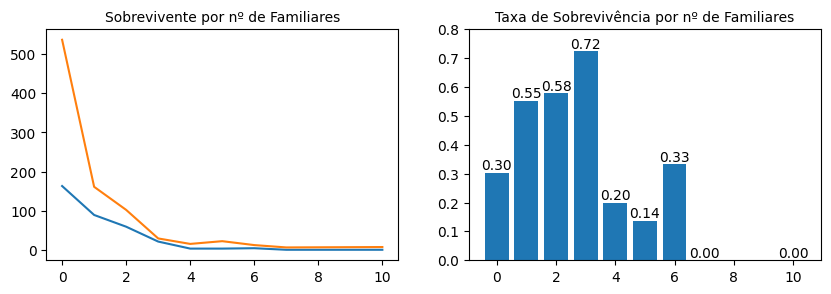

In [84]:
fig, ax = plt.subplots(ncols=2, figsize=(10,3))

ax[0].plot(Familiares_df.Familiares, Familiares_df.Sobreviventes)
ax[0].plot(Familiares_df.Familiares, Familiares_df.Total)
ax[0].set_title('Sobrevivente por nº de Familiares', fontsize=10)

labels1 = ax[1].bar(Familiares_df.Familiares, Familiares_df.taxa_sobrevivencia)
ax[1].bar_label(labels1, fmt='%.02f')
ax[1].set(ylim=(0, 0.8))
ax[1].set_title('Taxa de Sobrevivência por nº de Familiares', fontsize=10)

plt.show()

* O que podemos analisar deste gráfico?
    - Pessoas que viajam em família, entre 1 a 3 pessoas, tem uma maior taxa de sobrevivência

#### Usando esta nova base de dados no modelo

In [85]:
treino.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S,Sozinho,Familiares
0,1,0,3,-0.592240,1,0,-0.312011,1,0,0,1,0,1
1,2,1,1,0.638529,1,0,2.461242,0,1,0,0,0,1
2,3,1,3,-0.284548,0,0,-0.282777,0,0,0,1,1,0


In [86]:
teste.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S,Sozinho,Familiares
0,892,3,0.331562,0,0,-0.280670,1,0,1,0,1,0
1,893,3,1.311954,1,0,-0.315800,0,0,0,1,0,1
2,894,2,2.488424,0,0,-0.201943,1,0,1,0,1,0


* Aplicando nos modelos

In [87]:
X = treino.drop(['PassengerId', 'Survived'], axis=1)
y = treino.Survived

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

* Árvore de Classificação

In [88]:
clf_ac = tree.DecisionTreeClassifier(random_state=42)
clf_ac = clf_ac.fit(X_train, y_train)

y_pred_ac = clf_ac.predict(X_val)

as_ac = accuracy_score(y_val, y_pred_ac)

as_ac

0.735593220338983